Data Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NLP Text Libraries

In [3]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...


EDA Analysis

In [7]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

Feature Engineering 

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

Model Selection and Evaluation

In [10]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
     

In [11]:
df = pd.read_pickle('preprocesseddf.pkl')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewUrl,reviewedIn,variant,variantAsin,reviews
0,B09G9BL5CP,India,11-08-2024,True,4,https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,charger every thing good iphones nothing compa...
1,B09G9BL5CP,India,16-08-2024,True,5,https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,iphone gb look fabulous android user switched ...
2,B09G9BL5CP,India,14-05-2024,True,4,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,flip camera option nill tried flip camera reco...
3,B09G9BL5CP,India,24-06-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,product genuine
4,B09G9BL5CP,India,18-05-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,good product happy get iphone amazon offer


In [12]:
def Labelling(Rows):
  if(Rows["ratingScore"] > 3.0):
    Label = "Positive"
  elif(Rows["ratingScore"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

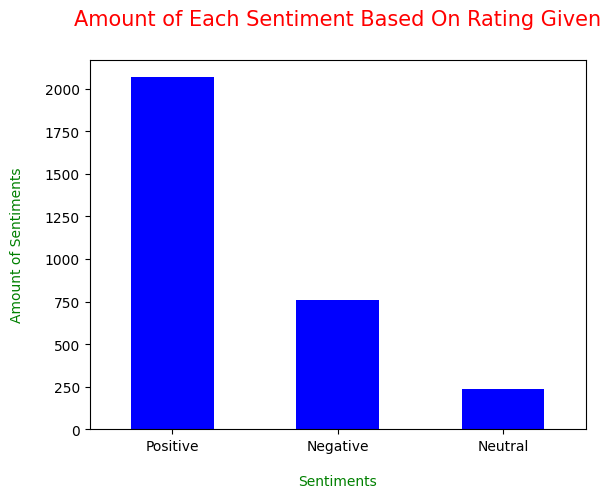

In [13]:
import matplotlib.pyplot as plt

# Apply the Labelling function to create the 'sentiment' column
df["sentiment"] = df.apply(Labelling, axis=1)

# Plot the distribution of sentiments
df["sentiment"].value_counts().plot(kind="bar", color="blue")
plt.title("Amount of Each Sentiment Based On Rating Given", loc="center", fontsize=15, color="red", pad=25)
plt.xlabel("Sentiments", color="green", fontsize=10, labelpad=15)
plt.xticks(rotation=0)
plt.ylabel("Amount of Sentiments", color="green", fontsize=10, labelpad=15)
plt.show()

In [14]:
Columns = ["productAsin","variantAsin"]
df.drop(columns = Columns, axis = 1, inplace = True)

In [15]:
df.head()

,country,date,isVerified,ratingScore,reviewUrl,reviewedIn,variant,reviews,sentiment
0,India,11-08-2024,True,4,https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,charger every thing good iphones nothing compa...,Positive
1,India,16-08-2024,True,5,https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,iphone gb look fabulous android user switched ...,Positive
2,India,14-05-2024,True,4,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,flip camera option nill tried flip camera reco...,Positive
3,India,24-06-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,product genuine,Positive
4,India,18-05-2024,True,5,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,good product happy get iphone amazon offer,Positive


In [16]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df["sentiment"] = Encoder.fit_transform(df["sentiment"])

In [17]:
df["sentiment"].value_counts()

sentiment
2    2065
0     758
1     239
Name: count, dtype: int64

In [18]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["reviews"])

# Check our matrix shape
X.shape

(3062, 5000)

In [19]:
# Declaring our target variable
y = df["sentiment"]

In [20]:
Counter(y)

Counter({2: 2065, 0: 758, 1: 239})

In [21]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [22]:
Counter(y_final)

Counter({2: 2065, 1: 2065, 0: 2065})

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

Model Selection and Evaluation

In [24]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.772979072193481
Logistic Regression Test Accuracy: 0.7704179174384194
SVC Test Accuracy: 0.7873805113793616
Random Forest Test Accuracy: 0.7991217985565562
Naive Bayes Test Accuracy: 0.7485373954141917
K-Neighbors Test Accuracy: 0.660669349172894


In [25]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

c:\Users\rajat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rajat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rajat\Ap

Best Accuracy: 88.96 %
Best Parameters: {'C': 3237.45754281764, 'penalty': 'l2'}


c:\Users\rajat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

c:\Users\rajat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy_score(y_test, Prediction)

0.8941252420916721

In [28]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [29]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


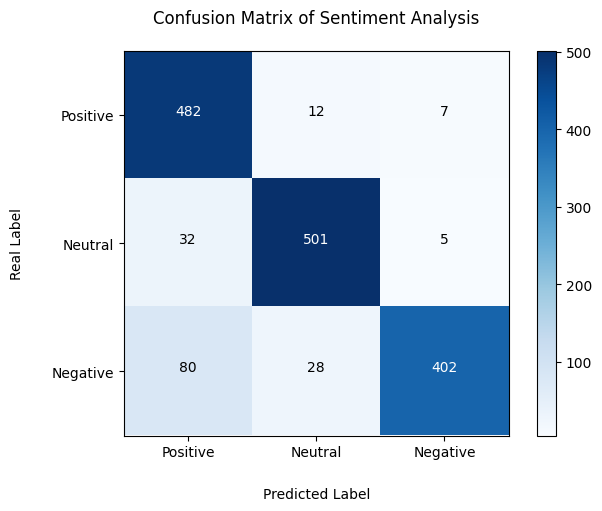

In [30]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

In [31]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       501
           1       0.93      0.93      0.93       538
           2       0.97      0.79      0.87       510

    accuracy                           0.89      1549
   macro avg       0.90      0.89      0.89      1549
weighted avg       0.90      0.89      0.89      1549

